In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('C:\\Users\\Hp\\Pictures\\spam.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.drop_duplicates(inplace=True)
df.shape

(5157, 2)

In [6]:
df['label'] = df['Category'].map({'ham': 0, 'spam': 1})
df.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df.drop(['Category'], axis=1, inplace=True)
df.head() 

,Message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

import string



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def preprocess_text(message):
    without_punc = [char for char in message if char not in string.punctuation]
    without_punc = ''.join(without_punc)
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]


In [14]:
df['Message'].head().apply(preprocess_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

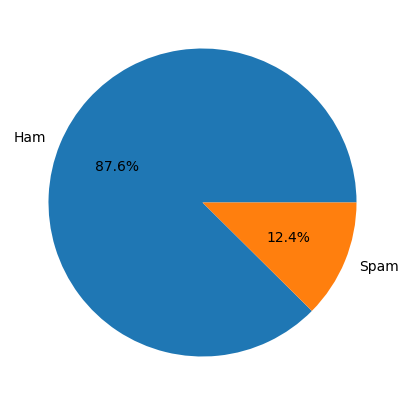

In [16]:
import matplotlib.pyplot as plt
total_0, total_1 = len(df[df["label"] == 0]), len(df[df["label"] == 1])
label = np.array(["Ham", "Spam"])
values = np.array([total_0, total_1])
plt.figure(figsize=(5, 5))
plt.pie(values, labels=label, autopct="%.1f%%")
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
x = df['Message']
y = df['label']
cv = CountVectorizer()
x= cv.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       897
           1       0.89      0.95      0.92       135

    accuracy                           0.98      1032
   macro avg       0.94      0.97      0.95      1032
weighted avg       0.98      0.98      0.98      1032


Confusion Matrix:
 [[881  16]
 [  7 128]]

Accuracy :  0.9777131782945736


In [20]:
def sms(text):
    labels = ['not spam','spam'] 
    x = cv.transform(text).toarray()
    p = classifier.predict(x)
    s = [str(i) for i in p]
    a = int("".join(s))
    res = str("This masege is:: "+ labels[a])
    print(res)

In [22]:
sms(['we cannot reply you'])


This message is looking: not spam
